### https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

In [1]:
%matplotlib inline   
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
LARGE_FIG_SIZE=(20, 15)

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing  import  OrdinalEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
df = pd.read_csv('./imdb_master.csv', encoding="latin-1")
df

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt
...,...,...,...,...,...
99995,99995,train,"Delightfully awful! Made by David Giancola, a ...",unsup,9998_0.txt
99996,99996,train,"Watching Time Chasers, it obvious that it was ...",unsup,9999_0.txt
99997,99997,train,At the beginning we can see members of Troma t...,unsup,999_0.txt
99998,99998,train,"The movie was incredible, ever since I saw it ...",unsup,99_0.txt


In [3]:
df = df.drop(['Unnamed: 0','file'],axis=1)
df

,type,review,label
0,test,Once again Mr. Costner has dragged out a movie...,neg
1,test,This is an example of why the majority of acti...,neg
2,test,"First of all I hate those moronic rappers, who...",neg
3,test,Not even the Beatles could write songs everyon...,neg
4,test,Brass pictures (movies is not a fitting word f...,neg
...,...,...,...
99995,train,"Delightfully awful! Made by David Giancola, a ...",unsup
99996,train,"Watching Time Chasers, it obvious that it was ...",unsup
99997,train,At the beginning we can see members of Troma t...,unsup
99998,train,"The movie was incredible, ever since I saw it ...",unsup


In [4]:
df.label.unique()

array(['neg', 'pos', 'unsup'], dtype=object)

In [5]:
# df = df[df.label != 'unsup']
# df

In [6]:
df.label.unique()

array(['neg', 'pos', 'unsup'], dtype=object)

In [7]:
## Map Movie review emotion : Postive = 1, Negatif = -1
df['label'] = df['label'].map({'unsup': 2, 'pos': 1, 'neg': 0})
df.label.unique()

array([0, 1, 2])

In [8]:
df.head()

,type,review,label
0,test,Once again Mr. Costner has dragged out a movie...,0
1,test,This is an example of why the majority of acti...,0
2,test,"First of all I hate those moronic rappers, who...",0
3,test,Not even the Beatles could write songs everyon...,0
4,test,Brass pictures (movies is not a fitting word f...,0


In [9]:
df.type.unique()

array(['test', 'train'], dtype=object)

In [10]:
df.groupby('label').count().review

label
0    25000
1    25000
2    50000
Name: review, dtype: int64

In [11]:
text_neu = " ".join(review for review in df.query('label == 0').review)

# Create a WordCloud object
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(text_neu)

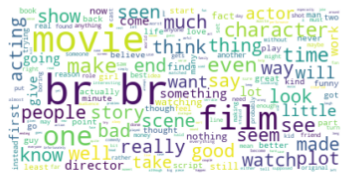

In [12]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# df['review'] = df['review'].apply(remove_html_tags)
# df

In [14]:
stopwords = set(STOPWORDS)
stopwords.update(['movie','film','character','characters','story','one','make','will','is'])



def plotWords(label=0):
    
    sentence = df.groupby('label').get_group(label)
    text = " ".join(s for s in sentence.review).strip()
        
    wordcloud = WordCloud(stopwords=stopwords, max_words=10).generate(text)
    
    labels = list(wordcloud.words_.keys())
    values = list(wordcloud.words_.values())

    plt.bar(labels, values, align='center', alpha=1)
    plt.xticks(labels, rotation='vertical')
    plt.show()


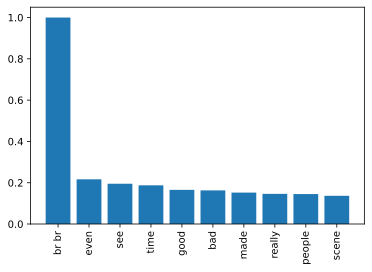

In [15]:
plotWords()

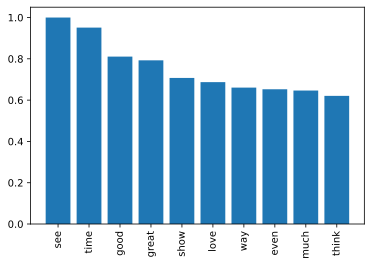

In [16]:
plotWords(1)

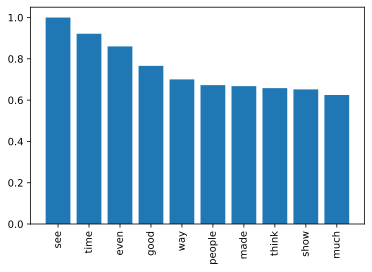

In [17]:
plotWords(2)

## Logistic Regression using sklearn 

## Using Keras 

In [15]:
# allTexts = df.review.str.lower() 
# maxlen = len(max(allTexts, key=len).split())
# maxlen, allTexts

In [16]:
from keras.preprocessing.text import Tokenizer

# tk = Tokenizer()
# tk.fit_on_texts(allTexts)
# tk   
# word_dict = tk.word_index

In [17]:
df_train = df.query('type == "train"')
df_train.reset_index(inplace=True)
df_train.drop(['index', 'type'], inplace=True, axis=1)
df_train 

,review,label
0,Story of a man who has unnatural feelings for ...,0
1,Airport '77 starts as a brand new luxury 747 p...,0
2,This film lacked something I couldn't put my f...,0
3,"Sorry everyone,,, I know this is supposed to b...",0
4,When I was little my parents took me along to ...,0
...,...,...
74995,"Delightfully awful! Made by David Giancola, a ...",2
74996,"Watching Time Chasers, it obvious that it was ...",2
74997,At the beginning we can see members of Troma t...,2
74998,"The movie was incredible, ever since I saw it ...",2


In [18]:
df_test = df.query('type == "test"')
df_test.reset_index(inplace=True)
df_test.drop(['type', 'index'], inplace=True, axis=1)
df_test


,review,label
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0
...,...,...
24995,I was extraordinarily impressed by this film. ...,1
24996,"Although I'm not a golf fan, I attended a snea...",1
24997,"From the start of ""The Edge Of Love"", the view...",1
24998,"This movie, with all its complexity and subtle...",1


In [19]:
df_test.groupby('label').count()

,review
label,
0,12500
1,12500


In [20]:
df_train.groupby('label').count()

,review
label,
0,12500
1,12500
2,50000


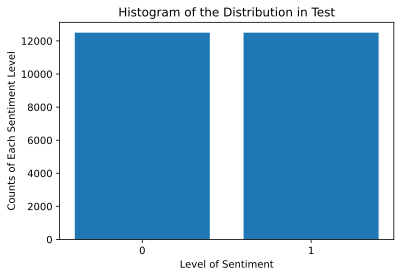

In [21]:
sentiment_counts = df_test.groupby('label').count().review
plt.bar(df_test.label.unique(), sentiment_counts, align='center')
plt.gca().set_xticks(df_test.label.unique())
plt.title('Histogram of the Distribution in Test')
plt.xlabel('Level of Sentiment')
plt.ylabel('Counts of Each Sentiment Level')
plt.show()

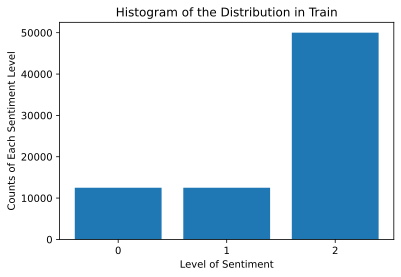

In [22]:
sentiment_counts = df_train.groupby('label').count().review
plt.bar(df_train.label.unique(), sentiment_counts, align='center')
plt.gca().set_xticks(df_train.label.unique())
plt.title('Histogram of the Distribution in Train')
plt.xlabel('Level of Sentiment')
plt.ylabel('Counts of Each Sentiment Level')
plt.show()

## Dropping neutral label and retraining

In [23]:
df_train = df_train[df_train['label'] != 2]

In [24]:
df_train.label.unique()

array([0, 1])

In [25]:
df_test.groupby('label').count()

,review
label,
0,12500
1,12500


In [26]:
df_train.groupby('label').count()

,review
label,
0,12500
1,12500


## Reconstructing database

In [27]:
df = df[df['label'] != 2]
df

,type,review,label
0,test,Once again Mr. Costner has dragged out a movie...,0
1,test,This is an example of why the majority of acti...,0
2,test,"First of all I hate those moronic rappers, who...",0
3,test,Not even the Beatles could write songs everyon...,0
4,test,Brass pictures (movies is not a fitting word f...,0
...,...,...,...
49995,train,"Seeing as the vote average was pretty low, and...",1
49996,train,"The plot had some wretched, unbelievable twist...",1
49997,train,I am amazed at how this movie(and most others ...,1
49998,train,A Christmas Together actually came before my t...,1


In [28]:
df.groupby('label').count().review

label
0    25000
1    25000
Name: review, dtype: int64

In [29]:
df.head(5)

,type,review,label
0,test,Once again Mr. Costner has dragged out a movie...,0
1,test,This is an example of why the majority of acti...,0
2,test,"First of all I hate those moronic rappers, who...",0
3,test,Not even the Beatles could write songs everyon...,0
4,test,Brass pictures (movies is not a fitting word f...,0


In [30]:
from sklearn.feature_extraction import text
import re

stop_words = text.ENGLISH_STOP_WORDS

def clean_review(review, stopwords):
    html_tag = re.compile('<.*?>')
    cleaned_review = re.sub(html_tag, "", review).split()
    cleaned_review = [i for i in cleaned_review if i not in stopwords]
    return " ".join(cleaned_review)


In [32]:
df["cleaned_review"] = df["review"].apply(lambda x: clean_review(x, stop_words))
df

,type,review,label,cleaned_review
0,test,Once again Mr. Costner has dragged out a movie...,0,Once Mr. Costner dragged movie far longer nece...
1,test,This is an example of why the majority of acti...,0,This example majority action films same. Gener...
2,test,"First of all I hate those moronic rappers, who...",0,"First I hate moronic rappers, could'nt act gun..."
3,test,Not even the Beatles could write songs everyon...,0,"Not Beatles write songs liked, Walter Hill mop..."
4,test,Brass pictures (movies is not a fitting word f...,0,Brass pictures (movies fitting word them) real...
...,...,...,...,...
49995,train,"Seeing as the vote average was pretty low, and...",1,"Seeing vote average pretty low, fact clerk vid..."
49996,train,"The plot had some wretched, unbelievable twist...",1,"The plot wretched, unbelievable twists. Howeve..."
49997,train,I am amazed at how this movie(and most others ...,1,I amazed movie(and average 5 stars lower crapp...
49998,train,A Christmas Together actually came before my t...,1,"A Christmas Together actually came time, I've ..."


### Create the embedding matrix

In [33]:
# embeddings_index = {}
# with open('glove.6B.300d.txt', encoding='utf-8') as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         coefs = np.asarray(values[1:], dtype='float32')
#         embeddings_index[word] = coefs

# embedding_matrix = np.zeros((len(word_dict) + 1, 300))
# for word, i in word_dict.items():
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         # words not found in embedding index will be all-zeros.
#         embedding_matrix[i] = embedding_vector

In [34]:
from keras.preprocessing.sequence import pad_sequences

max_features = 5000
oov = "OOV"
tokenizer = Tokenizer(num_words=max_features, oov_token =oov)
tokenizer.fit_on_texts(df["cleaned_review"])
tokenized = tokenizer.texts_to_sequences(df["cleaned_review"]) ## convert text into integers

In [35]:
from sklearn.preprocessing import LabelEncoder

def label_encode(base, le):
    le.fit(base['label'])
    s_le = le.transform(base['label'])
    return s_le, le

le = LabelEncoder()
label_le, le = label_encode(df, le)
le.classes_

array([0, 1])

In [36]:
np.save('classes.npy', le.classes_)

In [37]:
max_len = 500
Xtrain = pad_sequences(tokenized, maxlen=max_len)

from sklearn.model_selection import train_test_split

## we will do the splitting using a random state to ensure same splitting every time
X_train, X_test, y_train, y_test = train_test_split(Xtrain, label_le, 
                                                    test_size = .5,
                                                    random_state = 13)

In [38]:
# df_train = df_train[df_train['label'] != 2]
# df_train

In [39]:
from keras.utils.np_utils import to_categorical

In [40]:
# Y_train = np.array(df_train.label)
# Y_train = to_categorical(Y_train)
# Y_test = np.array(df_test.label)
# Y_test = to_categorical(Y_test)
# Y_train.shape, Y_test.shape

In [41]:
# Y_train

In [42]:
max_features

5000

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional
from keras.preprocessing import sequence


# https://stackoverflow.com/questions/58362316/how-do-i-go-from-pandas-dataframe-to-tensorflow-batchdataset-for-nlp 

vocab_size = max_features
embedding_vector_length = 128
num_epochs = 3

from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Conv1D, MaxPooling1D

model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_len))

#CNN 
model.add(Conv1D(128, kernel_size = 4, input_shape = (vocab_size, embedding_vector_length),
                 activation = "relu"))

# model.add(LSTM(300, activation= 'relu', return_sequences=True, input_shape=(50, 300), dropout=0.2))
                                                        #Maybe try 'tanh' activation also? recurrent_activation='hard_sigmoid'

model.add(MaxPooling1D(pool_size = 3))

# bidirectional LSTM
model.add(Bidirectional(LSTM(64, return_sequences = True)))

# LSTM 
model.add(LSTM(32, recurrent_dropout = 0.4))
model.add(Dropout(0.2))

# 1 neuron output layer and sigmoid activation (binary 0 or 1)
model.add(Dense(1, activation = "sigmoid"))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          640000    
_________________________________________________________________
conv1d (Conv1D)              (None, 497, 128)          65664     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 165, 128)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 165, 128)          98816     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [52]:
from tensorflow.keras.optimizers import Adam

opt = Adam(clipvalue=0.5) # Got Huge loss value, trying clipping gradients
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model_info = model.fit(X_train, y_train, epochs=2, batch_size=256, validation_data=(X_test, y_test))
model.save_weights("MovieReview.h5")

Epoch 1/2
98/98 [==============================] - 106s 1s/step - loss: 0.4383 - accuracy: 0.7798 - val_loss: 0.3182 - val_accuracy: 0.8677
Epoch 2/2
98/98 [==============================] - 119s 1s/step - loss: 0.2510 - accuracy: 0.9026 - val_loss: 0.2974 - val_accuracy: 0.8731


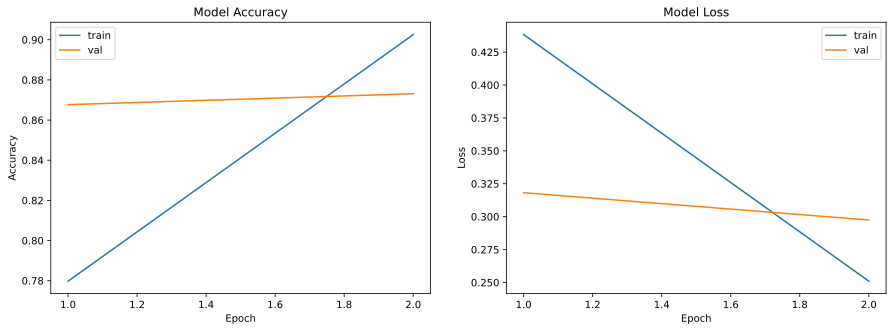

In [53]:
def plot_model_history(model_history):

    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('ModelHistory.png')
    plt.show()
plot_model_history(model_info)

In [54]:
results = model.evaluate(X_test[1000:], y_test[1000:])

750/750 [==============================] - 36s 47ms/step - loss: 0.2977 - accuracy: 0.8729


In [56]:
print("test loss: %.2f" % results[0])
print("test accuracy: %.2f%%" % (results[1] * 100))

test loss: 0.30
test accuracy: 87.29%


In [188]:
from random import randint

def try_random(iter=5):
    for _ in range(iter):
        r = randint(0, df.shape[0])
        predict_review = df.T[r]

        rv = clean_review(predict_review.review, stop_words)
        print('trying label {} at {} with : {} \n'.format(predict_review.label, r, rv))
        tt = tokenizer.texts_to_sequences([rv])
        tt = pad_sequences(tt, maxlen=max_len)
        res = model.predict(tt)
        print("---  Predicted {} and it's {} \n\n".format(res, predict_review.label))

In [189]:
try_random()

trying label 0 at 11434 with : ***SPOILERS*** This movie - called EATEN ALIVE UK quite possibly worst film brilliant just that. A sexy rich girl teams rugged action man search sister New Guinea jungle. What follows unspeakably crap mixture cannibalism, insane cults religious maniacs seen believed. The cannibalism scenes quite horrific badly staged acted prove quite amusing. The cast awful Janet Agren female lead excellent. Look scene stripped naked covered gold paint! My rating - 1 10. 

---  Predicted [[0.04318407]] and it's 0 


trying label 0 at 2895 with : Insane really. Even haven't seen original George Cukor movie Norma Shearer, Joan Crawford, Rosalind Russell, Paulette Goddard, Joan Fontaine cast thousand stars dismiss forced, politically correct, depressing comedy. Depressing different reasons. Meg Ryan one. What herself? Her face hardly move. That puts miles away Norma Shearer. Annette Bening suing DP Debra Messing, hell doing here? Actresses connection public's subconscious t

In [44]:
model.save("movieReview.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: movieReview.model/assets


In [46]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
encoder = LabelEncoder()
encoder.classes_ = numpy.load('classes.npy')